In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def weights(lambd,start_weight=1,L=400):
    start_weight = 1
    weights = start_weight*np.exp(-lambd*np.arange(L))
    pos_integral = 1/lambd
    half_life = np.log(2) / lambd
    sum_wt = weights.sum()
    log = f'lambda={lambd:2.1e}, half life={half_life:.2f}, sum={sum_wt:.2f}, Cumul. sum at'
    cum_sum = np.cumsum(weights)
    for point in 0,5,10,25,50:
        def_integral = (1 - np.exp(-lambd*point))/lambd
        discrete = cum_sum[point]
        ideal_pct = 100*def_integral/pos_integral
        pct = 100*discrete/weights.sum()
        log += f' t={point} ({pct:.1f}%)'
        
    return weights,log



lambda=1.0e-02, half life=69.31, sum=98.66, Cumul. sum at t=0 (1.0%) t=5 (5.9%) t=10 (10.6%) t=25 (23.3%) t=50 (40.7%)
lambda=5.0e-02, half life=13.86, sum=20.50, Cumul. sum at t=0 (4.9%) t=5 (25.9%) t=10 (42.3%) t=25 (72.7%) t=50 (92.2%)
lambda=1.0e-01, half life=6.93, sum=10.51, Cumul. sum at t=0 (9.5%) t=5 (45.1%) t=10 (66.7%) t=25 (92.6%) t=50 (99.4%)
lambda=5.0e-01, half life=1.39, sum=2.54, Cumul. sum at t=0 (39.3%) t=5 (95.0%) t=10 (99.6%) t=25 (100.0%) t=50 (100.0%)


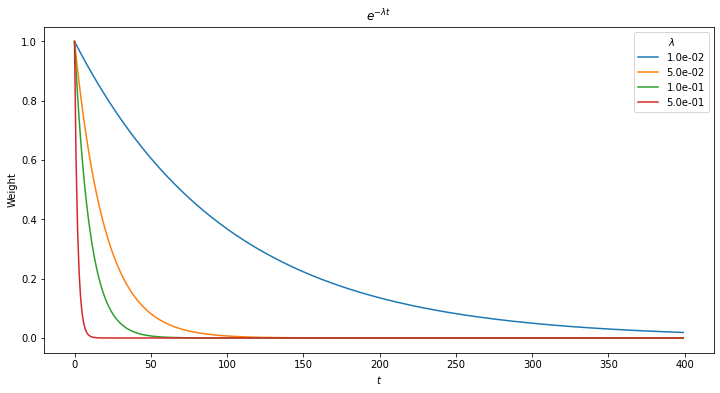

In [3]:
plt.figure(figsize=(12,6))
#for lambd in [0.0001,0.0025,0.005,0.01,0.025,0.05,0.075,0.1,0.25,0.5,0.75,1.0,2.0]:
for lambd in  [0.01,0.05,0.1,0.5]:   
    w,log = weights(lambd)
    plt.plot(w,label=f'{lambd:2.1e}')
    print(log)
plt.legend(title=r'$\lambda$')
plt.title(r'$e^{-\lambda t}$')
plt.xlabel(r'$t$')
plt.ylabel('Weight')
plt.show()

In [4]:
from scipy.stats import pareto
from scipy.stats import boltzmann

lambda=0.01, Cumul. sum at t=0 (1.2%) t=5 (6.7%) t=10 (12.0%) t=25 (26.5%) t=50 (46.2%)
lambda=0.05, Cumul. sum at t=0 (4.9%) t=5 (25.9%) t=10 (42.3%) t=25 (72.8%) t=50 (92.2%)
lambda=0.1, Cumul. sum at t=0 (9.5%) t=5 (45.1%) t=10 (66.7%) t=25 (92.6%) t=50 (99.4%)
lambda=0.25, Cumul. sum at t=0 (22.1%) t=5 (77.7%) t=10 (93.6%) t=25 (99.8%) t=50 (100.0%)
lambda=0.5, Cumul. sum at t=0 (39.3%) t=5 (95.0%) t=10 (99.6%) t=25 (100.0%) t=50 (100.0%)
lambda=1.0, Cumul. sum at t=0 (63.2%) t=5 (99.8%) t=10 (100.0%) t=25 (100.0%) t=50 (100.0%)


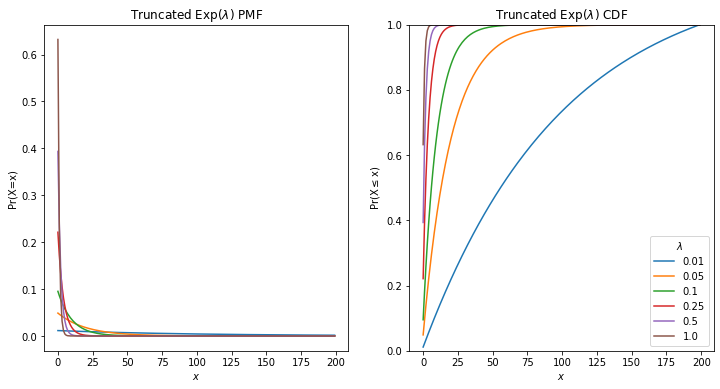

In [5]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))
L = 200
x = np.arange(0,L)
for alpha in [0.01,0.05,0.1,0.25,0.5,1.0]:   
    rv = boltzmann(alpha,L)
    pmf = rv.pmf(x)
    samples = [0,5,10,25,50]
    log = f'lambda={alpha}, Cumul. sum at'
    ax1.plot(x,rv.pmf(x),label=f'{alpha}')
    ax2.plot(x,rv.cdf(x),label=f'{alpha}')
    cdf_points = rv.cdf(samples).tolist()
    for p,c in zip(samples,cdf_points):
        log += f' t={p} ({100 *c:.1f}%)'
    print(log)

ax1.set_title(r'Truncated Exp($\lambda$) PMF')
ax1.set_xlabel(r'$x$')
ax1.set_ylabel('Pr(X=x)')
ax2.set_title(r'Truncated Exp($\lambda$) CDF')
ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'Pr(X$\leq$x)')
ax2.set_ylim(0.0,1.0)
plt.legend(title=r'$\lambda$')
plt.show()